In [567]:
# https://www.kaggle.com/c/home-data-for-ml-course
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##  Load Data and get some information

In [568]:
train = pd.read_csv('C:\\Users\\pingu\\Desktop\\Python\\Side project\\Housing Prices Competition for Kaggle Learn Users\\train.csv')

## Check Data 

In [569]:
## Checking
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Handle Missing Value

In [570]:
## Dealing with missing values
# train.columns[train.isna().any()]
train_no_col_na = train.dropna(axis = 1)

In [571]:
## Getting target value out of data frame
train_no_col_na = train_no_col_na.drop(labels = ['Id'],axis = 1)

In [572]:
## Seperating feature into catagory and numeric (for Std and one hot code)
train_cat = list(train_no_col_na.dtypes[train.dtypes == 'object'].index)
train_num = list(train_no_col_na.dtypes[train.dtypes == 'int64'].index)
print(train_cat)
print("-----------------------")
print(train_num)



['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
-----------------------
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [573]:
train_no_col_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

## Features Selection and Adjustment
https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-39dfa267b95a
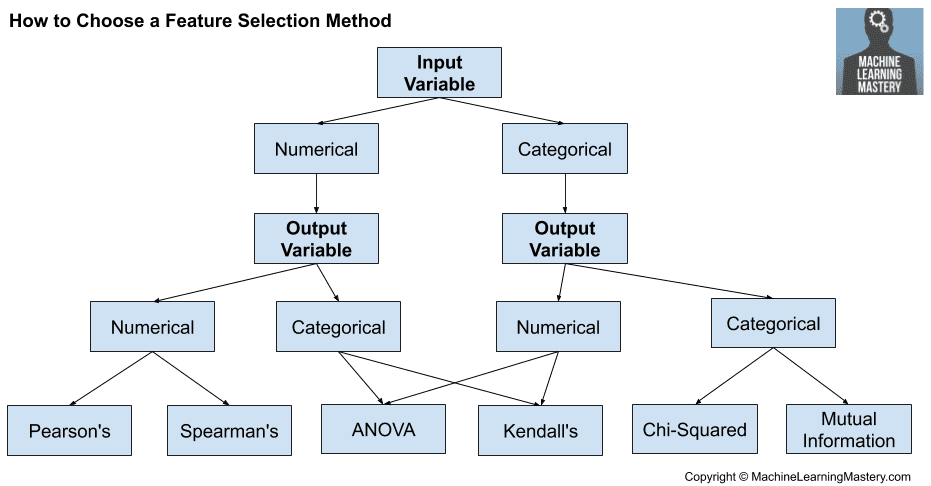
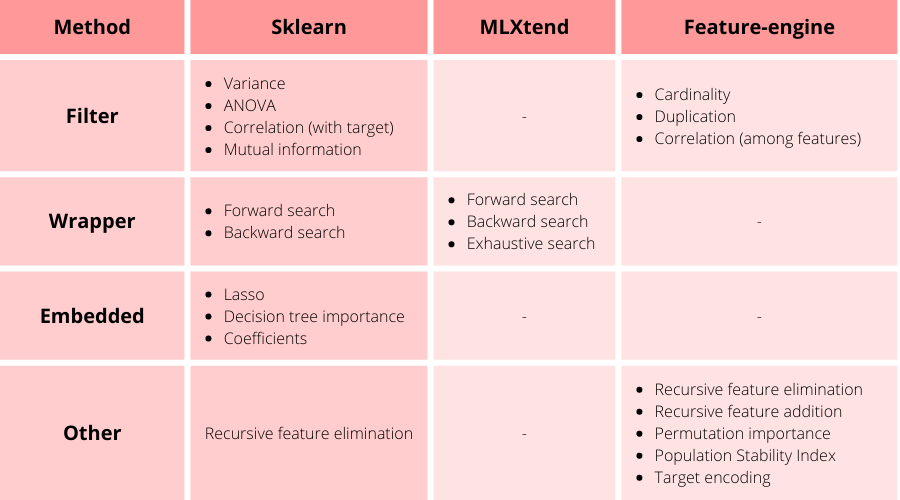
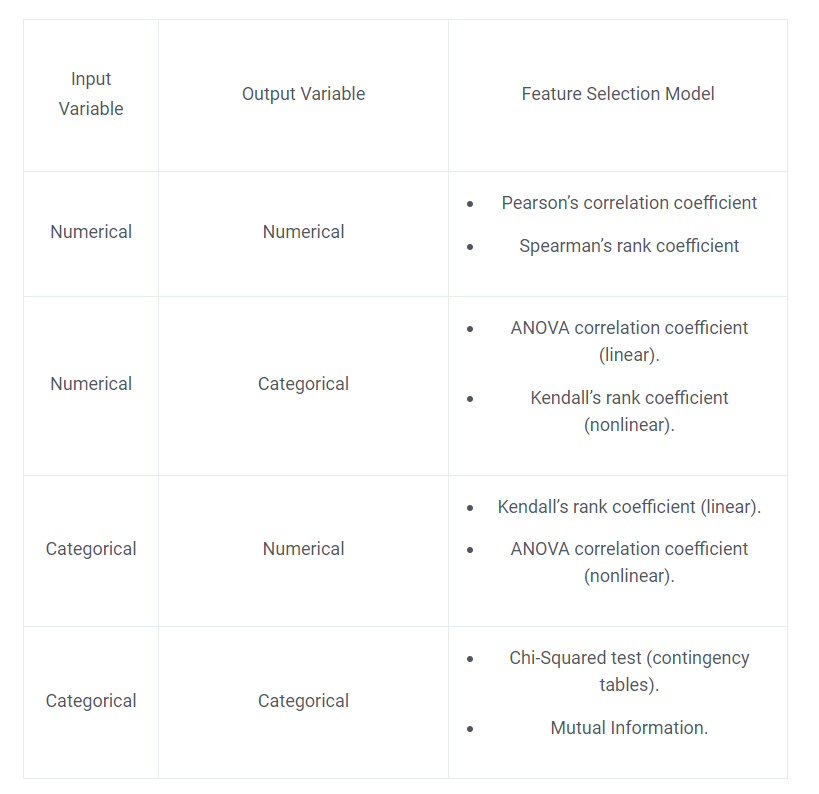

 ## Data Exploration in Numeric and Catagorical features


### Exploring the PDFs (target variable)


In [574]:
import seaborn as sns

There exist some extreme values at right-hand side. We need to deal with this outliers or we can do log transformation

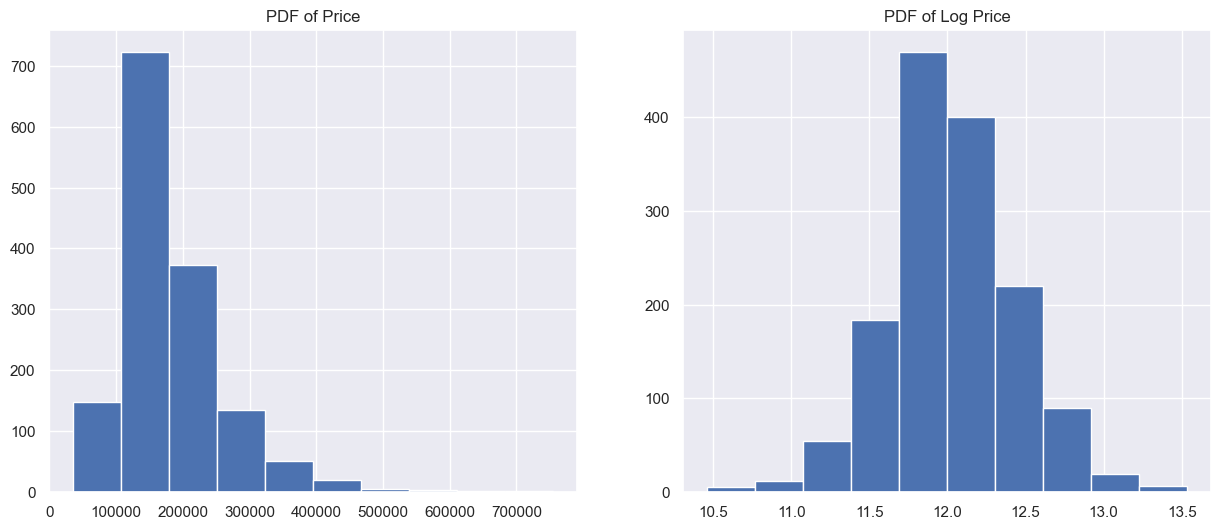

In [575]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize =(15,6))
ax1.hist(train_no_col_na['SalePrice'])
ax1.set_title('PDF of Price')

ax2.hist(np.log(train_no_col_na['SalePrice']))
ax2.set_title('PDF of Log Price')

plt.show()


### Plot for numeric varables 

<AxesSubplot:>

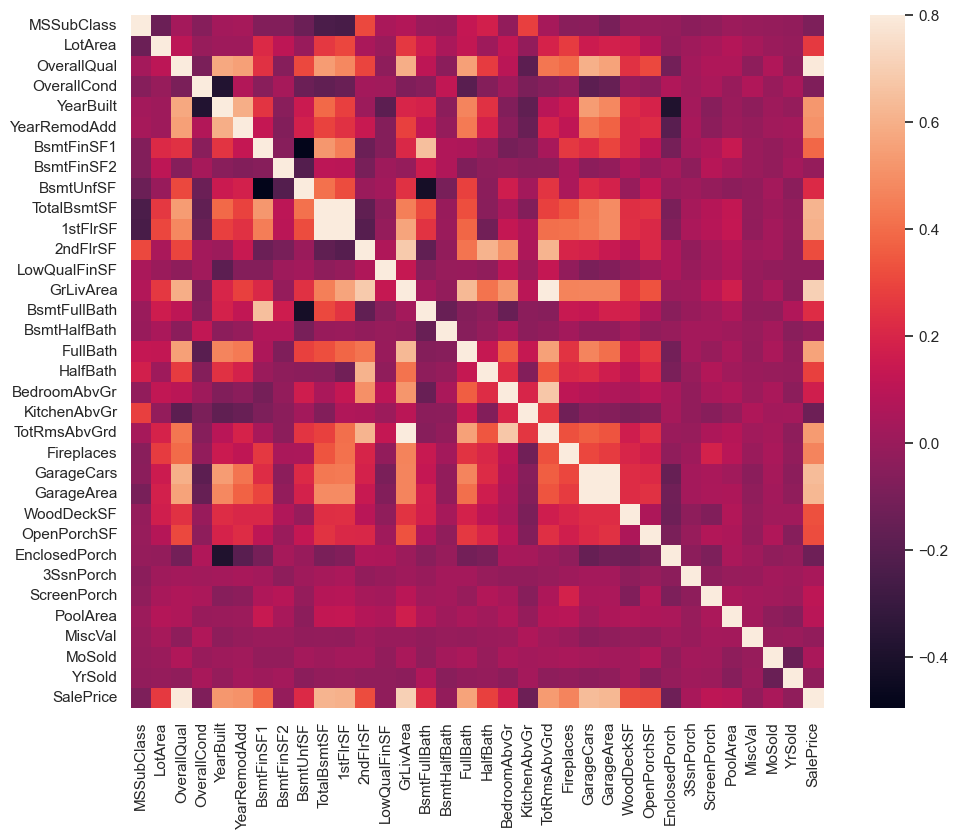

In [576]:
cor =train_no_col_na[train_num].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cor, vmax=.8, square=True)

In [577]:
## Select the numeric values which have high correlation with 'SalsePrice'
low_cor_with_price = cor.loc[:,abs(cor['SalePrice']) < 0.5].columns
train_num_high_cor_with_price = train_no_col_na.drop(labels = low_cor_with_price ,axis = 1)

### Plot for categorical varables 

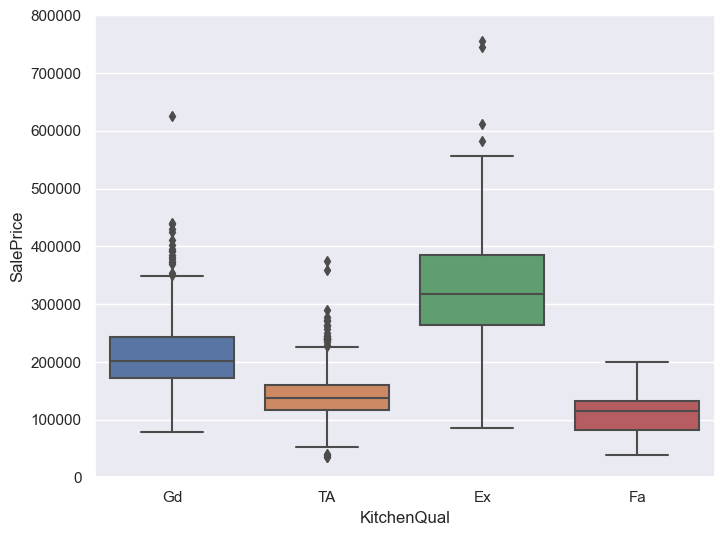

In [578]:
## KitchenQual
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = train['KitchenQual'], y = train['SalePrice'])
fig.axis(ymin=0, ymax=800000);

## Relationship Between Input and Output Variable (Multivariate Analysis)


### Numeric variables  (Selection)

In [579]:
low_cor_with_price

Index(['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

<AxesSubplot:>

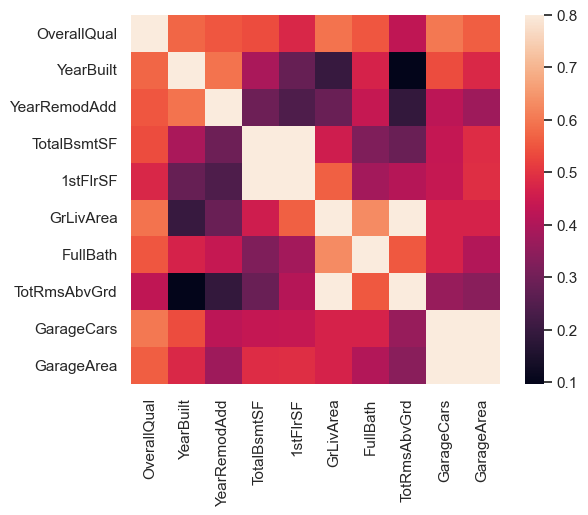

In [580]:
## Multicolinearity Check
num_cor = train_num_high_cor_with_price.drop(labels = ['SalePrice'],axis = 1).corr()
sns.heatmap(num_cor, vmax=.8, square=True)

In [581]:
## correlation selection functuon : dealing with multicolinearity
def correlation(df, threshold) :
    cor_columns = set()
    cor_matrix = df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j]) > threshold:
                colname = cor_matrix.columns[i]
                cor_columns.add(colname)
    return cor_columns

In [582]:
higg_cor_cols = correlation(train_num_high_cor_with_price.drop(labels = ['SalePrice'],axis = 1), 0.7) 
higg_cor_cols

{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}

In [583]:
# remove the multicollinearity
train_no_multicollinearity = train_num_high_cor_with_price.drop(labels = higg_cor_cols ,axis = 1)

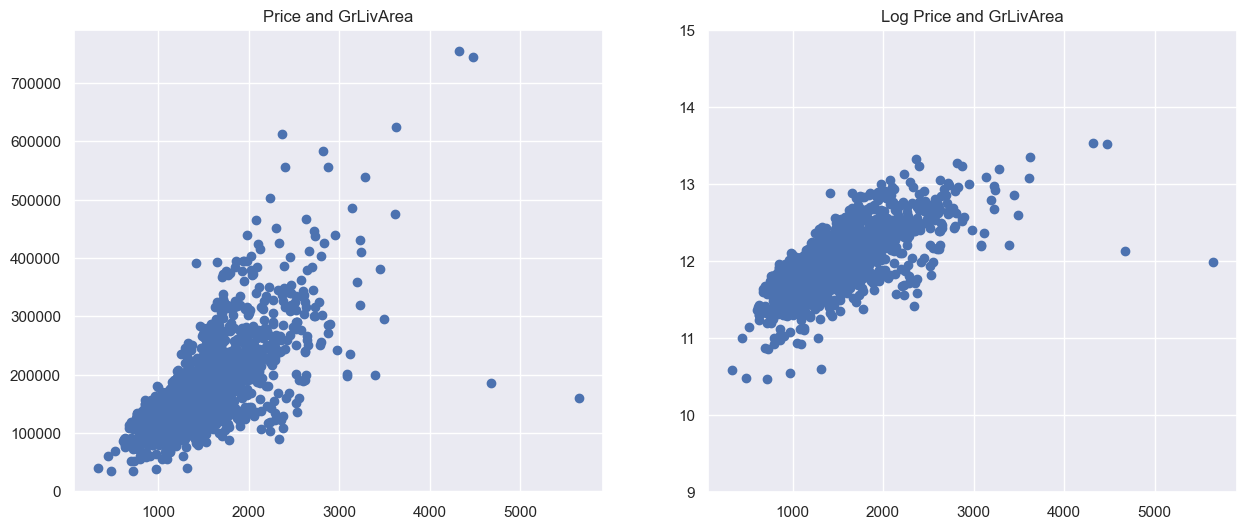

In [584]:
## sharey can let the different share the same axis limit
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize =(15,6))
ax1.scatter(x = train['GrLivArea'], y = train['SalePrice'])
ax1.set_title('Price and GrLivArea')
ax2.scatter(x = train['GrLivArea'], y = np.log(train['SalePrice']))
ax2.set_ylim([9, 15])
ax2.set_title('Log Price and GrLivArea')
plt.show()

In [585]:
train_no_multicollinearity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  OverallQual    1460 non-null   int64 
 13  YearBuilt      1460 non-null   int64 
 14  YearRemodAdd   1460 non-null   int64 
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

### Catagorical variables (Selection)
<br>Kendall's τ coefficient (after the Greek letter τ, tau), is a statistic used to measure the ordinal association between two measured quantities. A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient.<br>
https://machinelearningmastery.com/feature-selection-with-categorical-data/


In [600]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(train_no_multicollinearity[train_cat])
train_no_multicollinearity[train_cat] = enc.transform(train_no_multicollinearity[train_cat])

In [601]:
from scipy.stats import kendalltau
p = []
for i in range(len(train_no_multicollinearity[train_cat].columns)):
    X = train_no_multicollinearity[train_cat].iloc[:,i]
    result = kendalltau(X, train_no_multicollinearity['SalePrice'] )
    p.append(result.pvalue)

In [602]:
cat_pvalue = pd.Series(p, index = train_no_multicollinearity[train_cat].columns)

In [603]:
cat_pvalue = cat_pvalue.sort_values()

In [604]:
cat_pvalue

ExterQual        3.207225e-136
KitchenQual      9.206983e-114
Foundation        1.917167e-83
HeatingQC         6.839649e-73
MSZoning          5.556557e-38
SaleCondition     3.799777e-35
CentralAir        5.319642e-33
LotShape          2.080833e-31
PavedDrive        5.594374e-27
HouseStyle        3.029219e-21
Condition1        1.057106e-12
SaleType          1.154653e-11
Neighborhood      7.254276e-11
RoofStyle         9.972219e-08
Functional        2.362068e-07
ExterCond         8.608217e-07
BldgType          6.091912e-06
Heating           5.014518e-05
RoofMatl          1.331510e-03
Exterior2nd       3.669066e-03
Exterior1st       4.210430e-03
LotConfig         4.354768e-03
Condition2        1.837539e-02
LandSlope         5.496438e-02
Street            8.012556e-02
Utilities         5.233080e-01
LandContour       6.798301e-01
dtype: float64

Text(0.5, 1.0, 'Kendalltau p Values For Each Categorical Features')

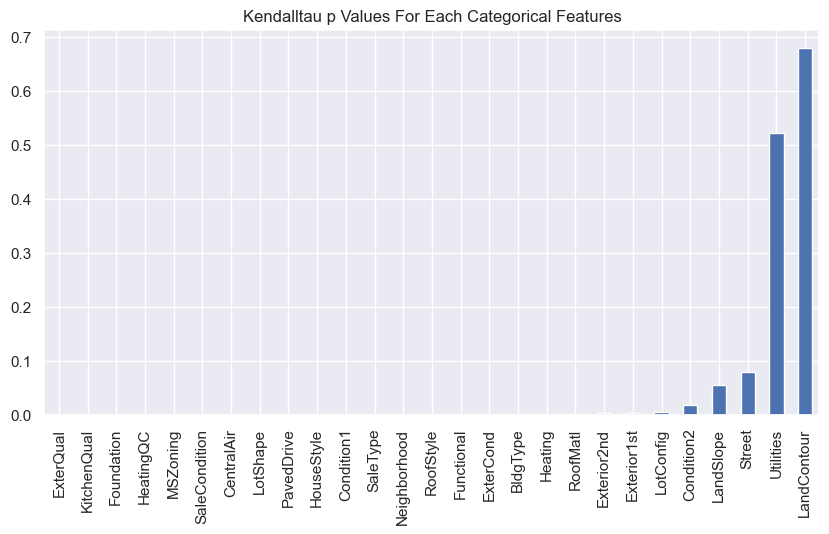

In [605]:
## The higher the p value , the more irrelenvent the feature to the target variable
cat_pvalue.plot.bar(figsize=(10, 5))
plt.title("Kendalltau p Values For Each Categorical Features")

In [610]:
drop_columns = list(cat_pvalue.index[19:27])
selected_columns = list(cat_pvalue.index[0:19])

In [611]:
train_selected_cat_features = train_no_multicollinearity.drop(labels = drop_columns ,axis = 1)

In [613]:
## Check those categorical variables with high freq
check_df  = train_no_col_na[train_selected_cat_features.columns].describe(include = 'all').loc['freq']
high_freq_coulmns = list(check_df.loc[check_df>1000].index)

In [615]:
## Remove the high frequencies columns
df = train_selected_cat_features.drop(labels = high_freq_coulmns, axis = 1 )

# We just want the columns name of df and select columns from train_no_col_na,this can prevent the change of data types .
# Make sure we bu
selected_features = list(df.drop(labels = 'SalePrice', axis = 1))
selected_features
train_preprocessed = train_no_col_na[df.columns]

train_preprocessed

,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,ExterQual,Foundation,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice
0,Reg,CollgCr,2Story,7,2003,2003,Gd,PConc,856,Ex,1710,2,Gd,2,208500
1,Reg,Veenker,1Story,6,1976,1976,TA,CBlock,1262,Ex,1262,2,TA,2,181500
2,IR1,CollgCr,2Story,7,2001,2002,Gd,PConc,920,Ex,1786,2,Gd,2,223500
3,IR1,Crawfor,2Story,7,1915,1970,TA,BrkTil,756,Gd,1717,1,Gd,3,140000
4,IR1,NoRidge,2Story,8,2000,2000,Gd,PConc,1145,Ex,2198,2,Gd,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Gilbert,2Story,6,1999,2000,TA,PConc,953,Ex,1647,2,TA,2,175000
1456,Reg,NWAmes,1Story,6,1978,1988,TA,CBlock,1542,TA,2073,2,TA,2,210000
1457,Reg,Crawfor,2Story,7,1941,2006,Ex,Stone,1152,Ex,2340,2,Gd,1,266500
1458,Reg,NAmes,1Story,5,1950,1996,TA,CBlock,1078,Gd,1078,1,Gd,1,142125


### Convert Catgorical to dummy 

In [616]:
train_dummies = pd.get_dummies(train_preprocessed, drop_first=True)

In [617]:
train_dummies['SalePrice'] = train_dummies['SalePrice'].apply(np.log)

### Prepare the Training elements 

In [618]:
y = train_dummies['SalePrice']
X = train_dummies.drop(labels = 'SalePrice', axis = 1)

## Training Model

###  Preprocess Training Data Frame

In [619]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

### Train Test Split

In [620]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=365)

### Create the regression

In [621]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
reg = LinearRegression()

# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [622]:
y_hat = reg.predict(x_train)

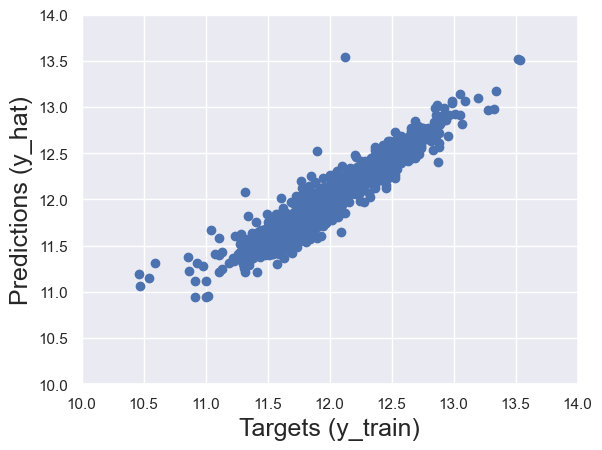

In [623]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(10,14)
plt.ylim(10,14)
plt.show()

In [624]:
reg.score(x_train,y_train)

0.878070446384783

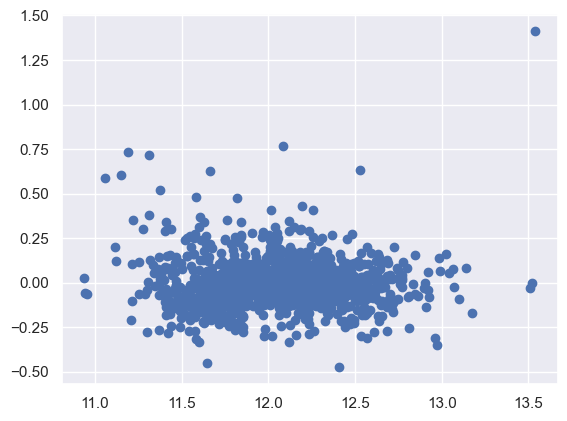

In [625]:
## Use residual analysis to check if the model follow the normality assumption in linear regression. 
plt.scatter(y_hat,y_hat-y_train)

### Finding the weights and bias

In [626]:
reg.intercept_

12.026602287225005

In [627]:
reg.coef_

array([ 9.79749297e-02,  2.02005439e-02,  3.93583629e-02,  5.99404312e-02,
        1.32590210e-01, -9.99799577e-03,  4.89243773e-02,  1.01438625e-02,
        1.14979202e-02, -7.37785456e-03, -1.23122506e-04, -1.68717686e-02,
        1.31407582e-02,  2.36552993e-02,  2.44207955e-02,  4.42346314e-02,
       -2.96759274e-03,  1.84233146e-02, -2.01348424e-02, -1.26498398e-02,
        1.01901058e-02,  2.54841024e-02,  3.26566766e-03,  1.87724011e-02,
        2.89141897e-02,  3.46073477e-02, -1.26935564e-02,  5.82924089e-03,
        1.21603544e-02,  1.40256831e-02,  2.60907057e-02,  2.58450322e-02,
        2.39469013e-02,  1.98729545e-02, -2.77957688e-03, -7.09369559e-03,
       -3.72291293e-03, -9.54610661e-04, -1.06822254e-02,  3.76056621e-03,
        3.71229247e-03, -1.19062116e-02, -1.09147697e-02,  3.34725529e-03,
        3.67270089e-02,  3.29532072e-02,  5.64443865e-03,  4.56648272e-03,
       -4.18956357e-03, -1.50835490e-02, -9.75879113e-03,  4.33781427e-19,
       -2.33450544e-02, -

In [628]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,OverallQual,9.797493e-02
1,YearBuilt,2.020054e-02
2,YearRemodAdd,3.935836e-02
3,TotalBsmtSF,5.994043e-02
4,GrLivArea,1.325902e-01
5,FullBath,-9.997996e-03
6,GarageCars,4.892438e-02
7,LotShape_IR2,1.014386e-02
8,LotShape_IR3,1.149792e-02
9,LotShape_Reg,-7.377855e-03


### Testing

In [629]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

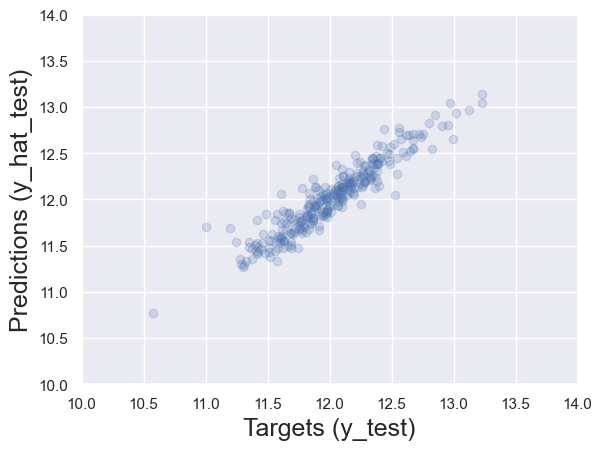

In [630]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(10,14)
plt.ylim(10,14)
plt.show()

In [631]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

,Prediction
0,138958.130844
1,87671.884245
2,254233.752217
3,172296.020447
4,332089.529244
...,...
287,107783.440930
288,125917.629842
289,97689.898286
290,140059.162266


In [632]:
## We need to reset the old indexes in y_test
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,138958.130844,107000.0
1,87671.884245,101000.0
2,254233.752217,244000.0
3,172296.020447,155000.0
4,332089.529244,318061.0
...,...,...
287,107783.440930,110000.0
288,125917.629842,110500.0
289,97689.898286,85000.0
290,140059.162266,117000.0


In [633]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [634]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,138958.130844,107000.0,-31958.130844,29.867412
1,87671.884245,101000.0,13328.115755,13.196154
2,254233.752217,244000.0,-10233.752217,4.194161
3,172296.020447,155000.0,-17296.020447,11.158723
4,332089.529244,318061.0,-14028.529244,4.410641
...,...,...,...,...
287,107783.440930,110000.0,2216.559070,2.015054
288,125917.629842,110500.0,-15417.629842,13.952606
289,97689.898286,85000.0,-12689.898286,14.929292
290,140059.162266,117000.0,-23059.162266,19.708686


## Test Model with New Data

In [691]:
# load data
new = pd.read_csv('test.csv')[selected_features]

In [692]:
new

,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,ExterQual,Foundation,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,KitchenQual,GarageCars
0,Reg,NAmes,1Story,5,1961,1961,TA,CBlock,882.0,TA,896,1,TA,1.0
1,IR1,NAmes,1Story,6,1958,1958,TA,CBlock,1329.0,TA,1329,1,Gd,1.0
2,IR1,Gilbert,2Story,5,1997,1998,TA,PConc,928.0,Gd,1629,2,TA,2.0
3,IR1,Gilbert,2Story,6,1998,1998,TA,PConc,926.0,Ex,1604,2,Gd,2.0
4,IR1,StoneBr,1Story,8,1992,1992,Gd,PConc,1280.0,Ex,1280,2,Gd,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Reg,MeadowV,2Story,4,1970,1970,TA,CBlock,546.0,Gd,1092,1,TA,0.0
1455,Reg,MeadowV,2Story,4,1970,1970,TA,CBlock,546.0,TA,1092,1,TA,1.0
1456,Reg,Mitchel,1Story,5,1960,1996,TA,CBlock,1224.0,Ex,1224,1,TA,2.0
1457,Reg,Mitchel,SFoyer,5,1992,1992,TA,PConc,912.0,TA,970,1,TA,0.0


In [693]:
f = new.isnull().sum()
col_with_NA = f.loc[f > 0].index.to_list()
col_with_NA

['TotalBsmtSF', 'KitchenQual', 'GarageCars']

In [694]:
new[col_with_NA].describe(include = 'all')

,TotalBsmtSF,KitchenQual,GarageCars
count,1458.000000,1458,1458.000000
unique,NaN,4,NaN
top,NaN,TA,NaN
freq,NaN,757,NaN
mean,1046.117970,NaN,1.766118
std,442.898624,NaN,0.775945
min,0.000000,NaN,0.000000
25%,784.000000,NaN,1.000000
50%,988.000000,NaN,2.000000
75%,1305.000000,NaN,2.000000


In [695]:
# Filling NA value
values = {'TotalBsmtSF': 988, 'KitchenQual': 'TA', 'GarageCars': 3}
new = new.fillna(value=values)

In [696]:
# convert to dummise
X_new = pd.get_dummies(new, drop_first=True)

# Handle unknown by using .reindex and .fillna()
X_new = X_new.reindex(columns = X.columns, fill_value=0)

In [697]:
# Scaling Features
scaler.fit(X_new)
X_new_scaled = scaler.transform(X_new)

In [698]:
y_hat_new_test = reg.predict(X_new_scaled)

In [699]:
y_hat_new_test

array([11.65302989, 11.94590702, 12.02638969, ..., 11.94567735,
       11.69783694, 12.30872674])

In [706]:
id_number = np.arange(1461, 1461+len(y_hat_new_test), 1)
d = {'id': id_number , 'SalePrice': np.exp(y_hat_new_test) }
prediction = pd.DataFrame(data=d)

In [708]:
prediction.to_csv('final_prediction.csv', index = False)